C:\Users\serez\AppData\Local\Temp\ipykernel_34048\3888723143.py:39: RuntimeWarning: divide by zero encountered in divide
  y = 1 / (a * c)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


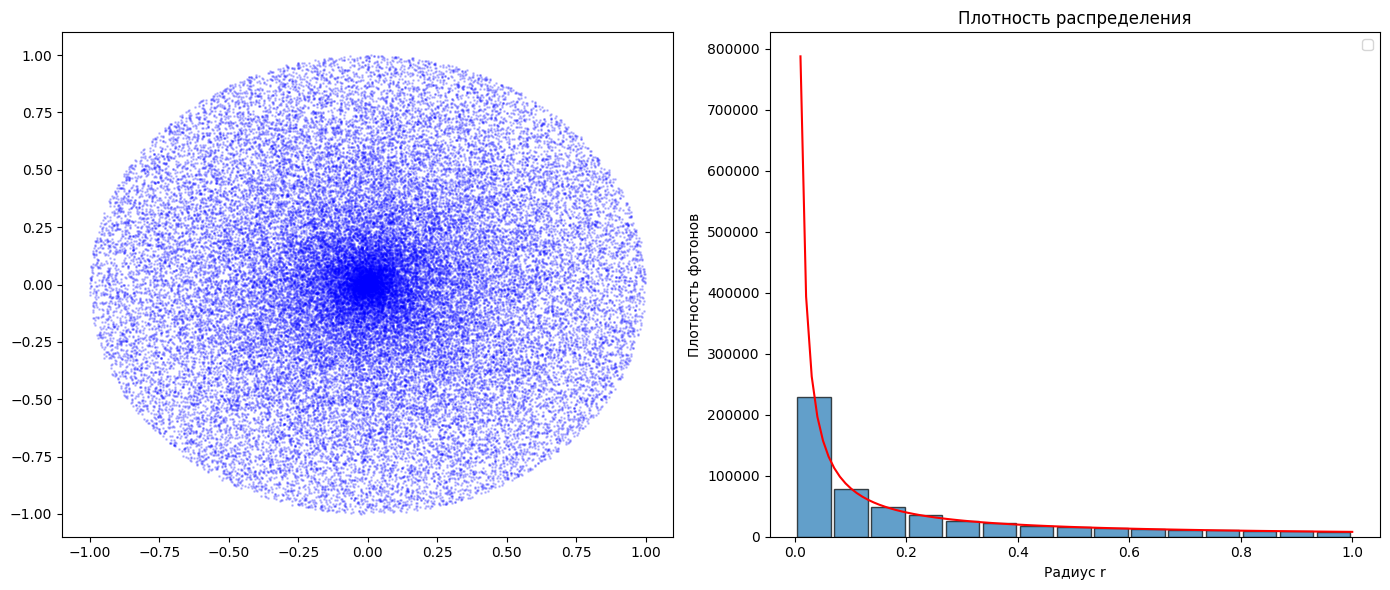

In [1]:
import numpy as np
import matplotlib.pyplot as plt

eps = 0.001
def generate_photon_positions(N, a):
    u = np.random.uniform(0, 1, N)
    r = a * u
    theta = np.random.uniform(0, 2 * np.pi, N)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))


def plot_results(positions, a, n_bins):
    x, y = positions[:, 0], positions[:, 1]
    r = np.sqrt(x ** 2 + y ** 2)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(x, y, s=1, alpha=0.2, c='blue')

    plt.subplot(1, 2, 2)
    edges = np.linspace(eps, a, n_bins + 1)
    counts, _ = np.histogram(r, bins=edges)

    # Вычисление площадей колец
    areas = np.pi * (edges[1:] ** 2 - edges[:-1] ** 2)
    density = counts / areas

    r = np.linspace(0.01, 10, 100)
    bin_centers = (edges[:-1] + edges[1:]) / 2
    plt.bar(bin_centers, density, width=(edges[1] - edges[0]) * 0.9,
            align='center', alpha=0.7, edgecolor='black')

    c = np.linspace(0, a, 100)  # Избегаем r=0, начиная с 0.01

    # Вычислите y = 1 / (a * r)
    y = 1 / (a * c)
    plt.plot(c, y * 50000/(2 * np.pi), color = "red")

    plt.title('Плотность распределения')
    plt.xlabel('Радиус r')
    plt.ylabel('Плотность фотонов')
    plt.legend()
    plt.grid(False)

    plt.tight_layout()
    plt.show()


positions = generate_photon_positions(50000, 1.0)
plot_results(positions, 1.0, n_bins=15)